# Neural Network Model

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
print(tf.__version__)

2.3.1


---

### MNIST Dataset
---
- MNIST dataset is a dataset of hand-written digits, 0 through 9.
- It contains 28×28 pixel grayscale images of handwritten single digits between 0 and 9

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- x_train data is `features` which represents the `pixel values` of the 28x28 images.
- y_train data is the `label` (0, 1, 2, 3,...,or 9)

### Visualizing of the data

In [5]:
import matplotlib.pyplot as plt

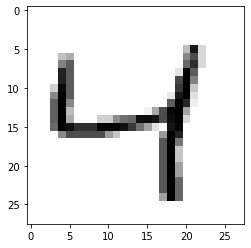

In [6]:
plt.imshow(x_train[2], cmap = plt.cm.binary)
plt.show()

Checking for the value for y_train with the same index.

In [7]:
print(y_train[2])

4


### Normalizing the dataset

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

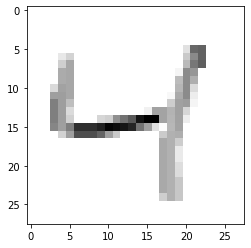

In [9]:
## Normalized array representation of image
print(x_train[2])

## Actual image
plt.imshow(x_train[2], cmap = plt.cm.binary)
plt.show()

## Building the model

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax')) ## OUTPUT layer = 10 because dataset is numbers from 0-9
## Complie the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

### Fit the model to training dataset

In [11]:
model.fit(x_train, y_train, epochs = 8)

Epoch 1/8
1875/1875 [==============================] - 1s 597us/step - loss: 0.2668 - accuracy: 0.9220
Epoch 2/8
1875/1875 [==============================] - 1s 577us/step - loss: 0.1077 - accuracy: 0.9665
Epoch 3/8
1875/1875 [==============================] - 1s 571us/step - loss: 0.0751 - accuracy: 0.9765
Epoch 4/8
1875/1875 [==============================] - 1s 573us/step - loss: 0.0548 - accuracy: 0.9829
Epoch 5/8
1875/1875 [==============================] - 1s 568us/step - loss: 0.0419 - accuracy: 0.9865
Epoch 6/8
1875/1875 [==============================] - 1s 571us/step - loss: 0.0336 - accuracy: 0.9887
Epoch 7/8
1875/1875 [==============================] - 1s 573us/step - loss: 0.0264 - accuracy: 0.9911
Epoch 8/8
1875/1875 [==============================] - 1s 570us/step - loss: 0.0223 - accuracy: 0.9923


- We have got hig accuracy and low loss this means model has learned how to classify digits.

### Testing on test dataset

In [12]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 419us/step - loss: 0.1035 - accuracy: 0.9719
0.10347460955381393
0.9718999862670898


### Saving the model

In [13]:
model.save('mnist_model.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: mnist_model.model\assets


### Loading the model

In [14]:
new_model = keras.models.load_model('mnist_model.model')

### Making predictions

In [15]:
pred = new_model.predict(x_test)

In [16]:
print(pred)

[[2.2717418e-12 1.1993947e-06 5.7268998e-08 ... 9.9973887e-01
  3.7204441e-11 2.3571524e-06]
 [2.4063745e-13 6.0955074e-08 9.9999988e-01 ... 3.4333027e-18
  4.2885549e-11 1.5116866e-17]
 [7.0251600e-09 9.9999392e-01 9.8599360e-09 ... 1.0983987e-06
  3.9933166e-06 2.5563691e-09]
 ...
 [1.9242317e-13 6.0522583e-09 3.6473649e-14 ... 4.1860545e-08
  3.5066938e-10 5.0828561e-08]
 [3.5606948e-13 6.9970960e-12 1.3432565e-16 ... 1.4603332e-10
  3.5486828e-08 9.8786817e-14]
 [1.0016814e-12 9.3183872e-10 1.2927179e-10 ... 1.1987675e-14
  4.3174121e-11 1.5631401e-16]]


In [17]:
import numpy as np

In [18]:
## Getting actual number from array
print(np.argmax(pred[0]))

7


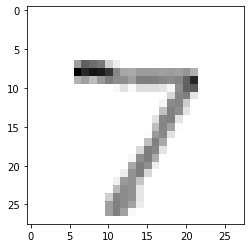

In [19]:
## Getting the image to cross-verify if prediction made is correct or not 
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

### Another one

In [20]:
print(np.argmax(pred[20]))

9


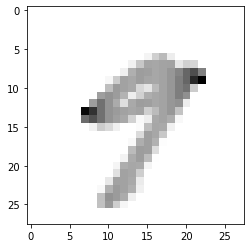

In [21]:
plt.imshow(x_test[20], cmap = plt.cm.binary)
plt.show()

-----